In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('College_adj.csv.xlsx', index_col=0)
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 109.3+

In [0]:
from sklearn.cluster import KMeans

In [0]:
km = KMeans(n_clusters=2)

In [6]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df['label'] = km.labels_

In [0]:
df0 = df[df['label'] == 0]

In [0]:
df1 = df[df['label'] == 1]

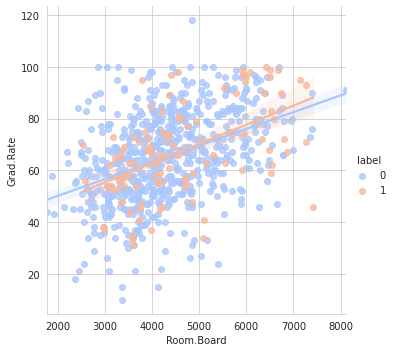

In [10]:
sns.set_style('whitegrid')
sns.lmplot('Room.Board', 'Grad.Rate', data=df, hue='label', palette='coolwarm')

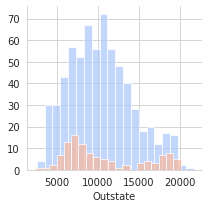

In [11]:
g = sns.FacetGrid(df, hue='label', palette='coolwarm')
g = g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

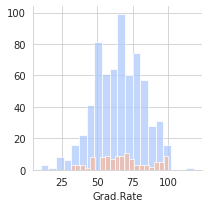

In [12]:
g = sns.FacetGrid(df, hue='label', palette='coolwarm')
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)

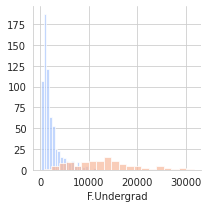

In [13]:
g = sns.FacetGrid(df, hue='label', palette='coolwarm')
g = g.map(plt.hist, 'F.Undergrad', bins=20, alpha=0.7)

In [14]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,label
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0


In [15]:
abs((df0.mean() - df1.mean())/(df0.mean() + df1.mean())).\
sort_values(ascending=False)

label          1.000000
F.Undergrad    0.712986
Apps           0.702172
Enroll         0.679136
Accept         0.671560
P.Undergrad    0.610852
Top10perc      0.242235
Expend         0.226748
Personal       0.144886
Top25perc      0.135297
PhD            0.101732
Terminal       0.079855
perc.alumni    0.071697
Books          0.046809
Room.Board     0.037087
Grad.Rate      0.018634
Outstate       0.015319
S.F.Ratio      0.002557
dtype: float64

In [16]:
print(df0['F.Undergrad'].mean(), df1['F.Undergrad'].mean())

2188.5485799701046 13061.935185185184


In [0]:
# private_label = pd.read_excel('College_Data.csv.xlsx')['Private'].replace({'Yes':0, 'No':1})

In [0]:
np.mean(df.label.values ==  private_label.values)

In [20]:
## classification

df2 = pd.read_excel('College_Data.csv.xlsx', index_col=0)
df2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [0]:
y = df2['Private']
x = df2.drop('Private', axis=1)

In [0]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, \
                                                   random_state=777)

In [0]:
svc = SVC()
rfc = RandomForestClassifier(n_estimators = 500)
log = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 10)

In [25]:
svc.fit(x_train,y_train)
predictions = svc.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.91      0.75      0.83        69
         Yes       0.90      0.97      0.94       165

    accuracy                           0.91       234
   macro avg       0.91      0.86      0.88       234
weighted avg       0.91      0.91      0.90       234



In [26]:
rfc.fit(x_train,y_train)
predictions = rfc.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.92      0.81      0.86        69
         Yes       0.92      0.97      0.95       165

    accuracy                           0.92       234
   macro avg       0.92      0.89      0.90       234
weighted avg       0.92      0.92      0.92       234



In [27]:
log.fit(x_train,y_train)
predictions = log.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.91      0.86      0.88        69
         Yes       0.94      0.96      0.95       165

    accuracy                           0.93       234
   macro avg       0.92      0.91      0.92       234
weighted avg       0.93      0.93      0.93       234



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.89      0.83      0.86        69
         Yes       0.93      0.96      0.94       165

    accuracy                           0.92       234
   macro avg       0.91      0.89      0.90       234
weighted avg       0.92      0.92      0.92       234



In [0]:
train_acc = []
test_acc = []

for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    train_acc.append(clf.score(x_train, y_train))
    test_acc.append((prediction==y_test).mean())

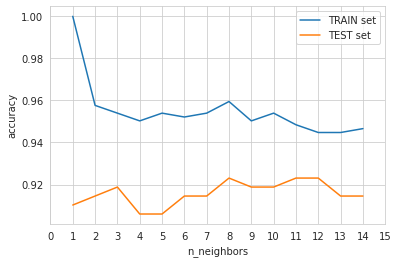

In [33]:
# plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()